## Vertical structure from glider

In this notebook we will look at and quantify the vertical structure in temperature. 

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt


Start by reading in some glider data. 

Notice that the data has dimensions of ctd_pressure and dives. Each dive is recorded as a separate profile. Also this dataset has been gridded every 4 m, which is why there is a data point every 4 m (corresponding to the middle of the bin). 

*Original glider data is a on finer grid, but here we binned it to smooth out some noise.*

In [7]:
ds_660 = xr.open_dataset('data/ctd_660_vert_4m_binned_29_june_2021.nc')
ds_660

<xarray.Dataset>
Dimensions:       (ctd_pressure: 250, dives: 1007)
Coordinates:
  * ctd_pressure  (ctd_pressure) float64 2.0 6.0 10.0 14.0 ... 990.0 994.0 998.0
  * dives         (dives) float64 1.0 1.5 2.0 2.5 ... 508.0 508.5 509.0 509.5
Data variables:
    sigma0        (ctd_pressure, dives) float64 ...
    SA            (ctd_pressure, dives) float64 ...
    CT            (ctd_pressure, dives) float64 ...
    time          (ctd_pressure, dives) datetime64[ns] ...
    latitude      (ctd_pressure, dives) float64 ...
    longitude     (ctd_pressure, dives) float64 ...
Attributes:
    units:          kg/m^3
    comment:        Calculated using GSW
    standard_name:  Potential Density Anomaly
    platform:       glider
    history:        [2021-07-26 18:06:26] (v2021.3) glidertools.cleaning.outl...
    outlier_lims:   [33.83323076 35.65218568]

Make some plots of glider dives. 
We can see the layering here. 

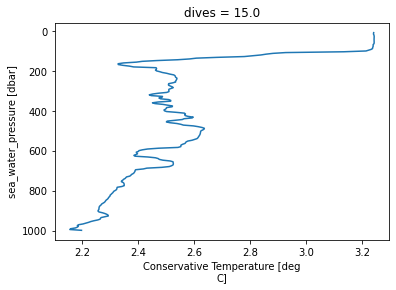

In [17]:
ds_660.CT.isel(dives=25).plot(y='ctd_pressure')
plt.gca().invert_yaxis()

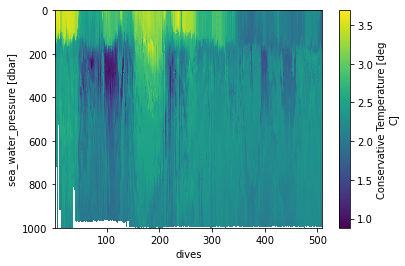

In [19]:
ds_660.CT.plot(y='ctd_pressure')
plt.gca().invert_yaxis()

Compute spectra from this data

In [18]:
import xrft 

In [34]:
# we only consider the structure below the mixed layer
CT_data = ds_660.CT.sel(ctd_pressure=slice(200, 950))

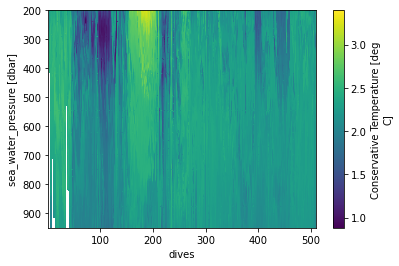

In [35]:
CT_data.plot(y='ctd_pressure')
plt.gca().invert_yaxis()

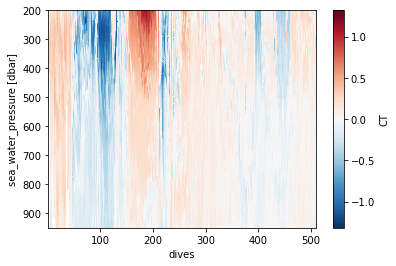

In [36]:

(CT_data - CT_data.mean('dives')).plot(y='ctd_pressure')
plt.gca().invert_yaxis()

In [39]:
CT_spec = xrft.power_spectrum(CT_data.dropna(dim='dives') - CT_data.mean('dives'),
                                     dim='ctd_pressure', window=True)

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,


In [40]:
CT_spec

<xarray.DataArray (freq_ctd_pressure: 188, dives: 878)>
array([[2.11831493e-07, 3.19782423e-07, 1.03589020e-05, ...,
        7.43521727e-07, 2.60272688e-09, 5.84397497e-08],
       [6.11228947e-07, 3.59404944e-06, 2.54062494e-05, ...,
        6.08137323e-07, 1.22825621e-06, 4.09219115e-06],
       [1.49037580e-06, 6.18201056e-06, 2.71279046e-05, ...,
        9.40496278e-07, 2.49483431e-06, 1.46985460e-05],
       ...,
       [1.00035050e-05, 4.23215683e-05, 4.83094334e-06, ...,
        3.18726346e-06, 1.25611132e-05, 7.43519122e-07],
       [1.49037580e-06, 6.18201056e-06, 2.71279046e-05, ...,
        9.40496278e-07, 2.49483431e-06, 1.46985460e-05],
       [6.11228947e-07, 3.59404944e-06, 2.54062494e-05, ...,
        6.08137323e-07, 1.22825621e-06, 4.09219115e-06]])
Coordinates:
  * dives              (dives) float64 6.0 15.0 15.5 16.0 ... 508.5 509.0 509.5
  * freq_ctd_pressure  (freq_ctd_pressure) float64 -0.125 -0.1237 ... 0.1237

(1e-05, 3)

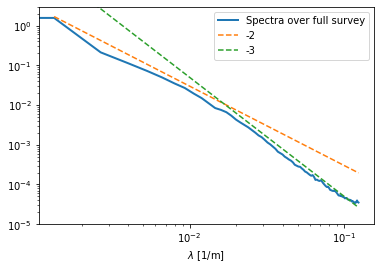

In [53]:
CT_spec.mean('dives').plot(label='Spectra over full survey', linewidth=2)
#CT_spec.sel(dives=slice(0,250)).mean('dives').plot(label='High EKE', linewidth=2)
#CT_spec.sel(dives=slice(250,500)).mean('dives').plot(label='Low EKE', linewidth=2)

kz = CT_spec.freq_ctd_pressure

plt.plot(kz, 3e-6*kz**(-2), '--', label='-2')
plt.plot(kz, 5e-8*kz**(-3), '--', label='-3')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ [1/m]')
plt.ylim([1e-5, 3])